<a href="https://colab.research.google.com/github/36ova/36ova/blob/master/task10/task10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 10. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 1 &mdash; 50 баллов
* Задача 2 &mdash; 40 баллов
* Задача 3 &mdash; 10 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [53]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

import random

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import torch
from torch import nn

from IPython.display import clear_output
sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/lecture9.pdf" target="_blank">презентацию</a> с занятия по нейронным сетям.

---
### Задача 1.

Рассмотрим двухслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = w_{21}u_1(x) + w_{22}u_2(x) + b_2,$$

$$u_1(x) = \sigma\big(w_{11}x + b_{11}\big),$$

$$u_2(x) = \sigma\big(w_{12}x + b_{12}\big).$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

<div>
<img src="https://drive.google.com/uc?id=1048-Loj5E82bo6F2XG_Gusa5rUI0aQyV" width="500"/>
</div>

**2.** Дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке минимизируя MSE
$$\text{MSE} = \sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; выписать производные по всем параметрам сети для использования градиентного спуска. Конечно, в данном случае довольно просто выписать все производные напрямую. Мы будем выписывать их поэтапно, так вам будет проще понять общую процедуру в дальнейшем.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = ...$$

Теперь мы можем взять производные выходов сети по весам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{21}} = ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{22}} = ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = ...$$

Наконец, выпишем производные MSE по весам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа.

$$\frac{\partial\:\text{MSE}}{\partial w_{21}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{...} \frac{\partial ...}{\partial w_{21}} = ... $$

$$\frac{\partial\:\text{MSE}}{\partial w_{22}} = \sum_{i=1}^n \frac{\partial \:\text{MSE}}{...} \frac{\partial ...}{\partial w_{22}} = ... $$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{...} \frac{\partial ...}{\partial b_2} = ... $$

<div>
<img src="https://drive.google.com/uc?id=1ZBp8dT_QepASPRkHN3wQB7INi7IO08sy" width="600"/>
</div>

<div>
<img src="https://drive.google.com/uc?id=1lO90e4BPCfXCl9IdVtFcxUcEMa2WXUSr" width="600"/>
</div>


**2.2.** Теперь будем разбираться с производным по параметрам первого слоя. Начнем с производной выхода сети по выходу певрого слоя.

$$\frac{\partial \widehat{y}(X_i)}{\partial u_1(X_i)} = ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial u_2(X_i)} = ...$$

Далее нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = ...$$

Теперь мы можем взять производные выходов первого слоя по его параметрам

$$\frac{\partial u_1(X_i)}{\partial w_{11}} = ...$$

$$\frac{\partial u_1(X_i)}{\partial b_{11}} = ...$$

$$\frac{\partial u_2(X_i)}{\partial w_{12}} = ...$$

$$\frac{\partial u_2(X_i)}{\partial b_{12}} = ...$$

Наконец, выпишем производные MSE по весам первого слоя. Аналогично, запишите правило производной сложной функции и выпишите итоговый ответ.

$$\frac{\partial\:\text{MSE}}{\partial w_{11}} = ...$$

$$\frac{\partial\:\text{MSE}}{\partial b_{11}} = ...$$

$$\frac{\partial\:\text{MSE}}{\partial w_{12}} = ...$$

$$\frac{\partial\:\text{MSE}}{\partial b_{12}} = ...$$

<div>
<img src="https://drive.google.com/uc?id=17OBRIVflJyB_K9ktK_F5ZptVzV2fXD41" width="600"/>
</div>
<div>
<img src="https://drive.google.com/uc?id=1MBJViJyOj3kYaKbrcS-njfKmNRcRMivZ" width="600"/>
</div>

Вы могли заметить, мы считали производные начиная с последнего слоя и постепенно доходили до первого. Подобная процедура называется *методом обратного распространения ошибки* (backpropagation), ее преимуществом является эффективное вычисление градиентов.

**3.** Выпишите формулу градиентного спуска по одному из параметров.

Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.
<div>
<img src="https://drive.google.com/uc?id=1-XyVEkcxT3WwqOJbml5kzNtuh5Sq8ysP" width="600"/>
</div>

---
### Задача 2.

Реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. шаблон класса задачи 4 из <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/task6.html#Задача-4." target="_blank">задания 6</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

In [2]:
def batch_generator(X, y, batch_size, num_batches):
    num_samples = len(X)

    for i in range(num_batches):
        perm = random.sample(range(1, num_samples), batch_size)
        yield np.take(X, perm), np.take(y, perm)

In [3]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [4]:
def loss_fn(Y_pred, Y_right):
    return metrics.mean_squared_error(Y_pred, Y_right) ** 0.5

In [5]:
class TwoLayerNetwork() :
    def __init__(self, learning_rate, iterations):
        self.iterations = iterations
        self.learning_rate = learning_rate

    def fit( self, X, y, X_val, y_val, k) :
        self.w11 = random.uniform(0, 1)
        self.w12 = random.uniform(0, 1)
        self.b11 = random.uniform(0, 1)
        self.b12 = random.uniform(0, 1)
        self.w21 = random.uniform(0, 1)
        self.w22 = random.uniform(0, 1)
        self.b2 = random.uniform(0, 1)

        batch_gen = batch_generator(X, y, k, self.iterations)
        self.train_losses = []
        self.val_losses = []
                  
        for it in range(self.iterations) :
            X_batch, y_batch = next(batch_gen)

            y_pred = self.predict(X_batch)
            y_pred_val = self.predict(X_val)

            self.train_losses.append(loss_fn(y_pred, y_batch))
            self.val_losses.append(loss_fn(y_pred_val, y_val))

            sum_dw11 = 0
            sum_dw12 = 0
            sum_db11 = 0
            sum_db12 = 0
            sum_dw21 = 0
            sum_dw22 = 0
            sum_db2 = 0

            for i in range(k):
                delta = y_pred[i] - y_batch[i]
                u1 = sigmoid(self.w11 * X_batch[i] + self.b11)
                u2 = sigmoid(self.w12 * X_batch[i] + self.b12)

                sum_dw21 += delta * u1
                sum_dw22 += delta * u2
                sum_db2 += delta
                
                sum_dw11 += delta * self.w21 * u1 * (1 - u1) * X_batch[i]
                sum_db11 += delta * self.w21 * u1 * (1 - u1)
                sum_dw12 += delta * self.w22 * u2 * (1 - u2) * X_batch[i]
                sum_db12 += delta * self.w22 * u2 * (1 - u2)
            
            self.w11 = self.w11 - self.learning_rate * sum_dw11
            self.w12 = self.w12 - self.learning_rate * sum_dw12
            self.b11 = self.b11 - self.learning_rate * sum_db11
            self.b12 = self.b12 - self.learning_rate * sum_db12
            self.w21 = self.w21 - self.learning_rate * sum_dw21
            self.w22 = self.w22 - self.learning_rate * sum_dw22
            self.b2 = self.b2 - self.learning_rate * sum_db2
        return self

    def predict( self, X ) :
        return self.w21 * sigmoid(self.w11 * X + self.b11) + self.w22 * sigmoid(self.w12 * X + self.b12) + self.b2

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

In [27]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
y = np.square(X)

assert y.shape == (sample_size, 1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)
X_train.shape, X_val.shape, X_test.shape

((600000, 1), (200000, 1), (200000, 1))

Обучите нейронную сеть на этих данных, а также простую линейную регрессию.

In [29]:
model_nn = TwoLayerNetwork(learning_rate=1e-5, iterations=500) #500
model_nn.fit(X_train, y_train, X_val, y_val, 2**16) #16

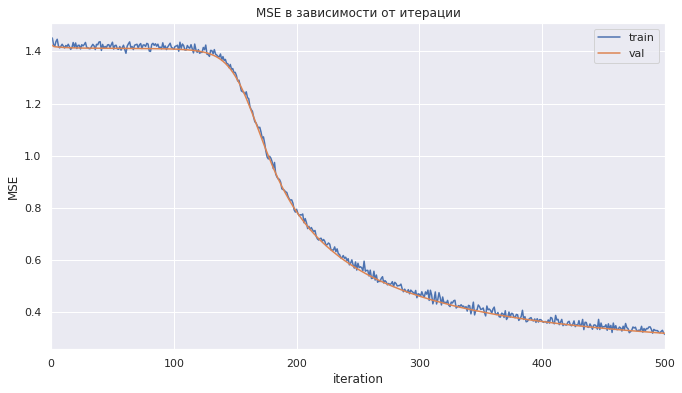

In [30]:
sns.set_theme()
plt.figure(figsize=(11, 6))

x_vals = np.arange(1, len(model_nn.train_losses) + 1)
sns.lineplot(x=x_vals, y=model_nn.train_losses, label="train")
sns.lineplot(x=x_vals, y=model_nn.val_losses, label="val")
plt.xlabel('iteration')
plt.ylabel('MSE')
plt.xlim((0, model_nn.iterations))

plt.legend()
plt.title("MSE в зависимости от итерации")
plt.show()

In [31]:
model_linreg = LinearRegression(fit_intercept=True)
model_linreg.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

In [32]:
test_nn_preds = model_nn.predict(X_test)
test_linreg_preds = model_linreg.predict(X_test.reshape(-1, 1))
print("MSE двуслойной нейронной сети: ", loss_fn(test_nn_preds, y_test))
print("MSE линейной регрессии:       ", loss_fn(test_linreg_preds, y_test))

MSE двуслойной нейронной сети:  0.3264746330637966
MSE линейной регрессии:        1.4158548983780277


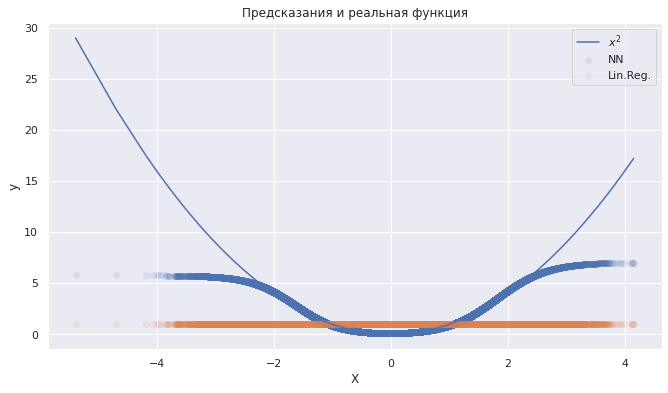

In [33]:
plt.figure(figsize=(11, 6))
plt.scatter(X_test.reshape(-1,), test_nn_preds.reshape(-1,), alpha=0.1, label="NN")
plt.scatter(X_test.reshape(-1,), test_linreg_preds.reshape(-1,), alpha=0.1, label="Lin.Reg.")
sns.lineplot(x=X_test.reshape(-1,), y=np.square(X_test).reshape(-1,), label=r"$x^2$")
plt.xlabel('X')
plt.ylabel('y')
plt.title("Предсказания и реальная функция")
plt.show()

Повторите вычисления для другой нелинейной функции $y(x)$.

In [34]:
y = np.power(X, 3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)
X_train.shape, X_val.shape, X_test.shape

((600000, 1), (200000, 1), (200000, 1))

In [35]:
model_nn = TwoLayerNetwork(learning_rate=1e-5, iterations=400)
model_nn.fit(X_train, y_train, X_val, y_val, 2**16)

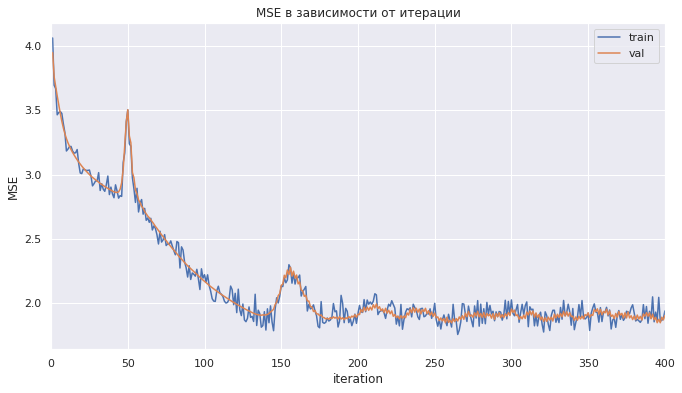

In [36]:
sns.set_theme()
plt.figure(figsize=(11, 6))

x_vals = np.arange(1, len(model_nn.train_losses) + 1)
sns.lineplot(x=x_vals, y=model_nn.train_losses, label="train")
sns.lineplot(x=x_vals, y=model_nn.val_losses, label="val")
plt.xlabel('iteration')
plt.ylabel('MSE')
plt.xlim((0, model_nn.iterations))

plt.legend()
plt.title("MSE в зависимости от итерации")
plt.show()

In [37]:
model_linreg = LinearRegression(fit_intercept=True)
model_linreg.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [38]:
test_nn_preds = model_nn.predict(X_test)
test_linreg_preds = model_linreg.predict(X_test.reshape(-1, 1))
print("MSE двуслойной нейронной сети: ", loss_fn(test_nn_preds, y_test))
print("MSE линейной регрессии:       ", loss_fn(test_linreg_preds, y_test))

MSE двуслойной нейронной сети:  1.8451088108775457
MSE линейной регрессии:        2.430973875414348


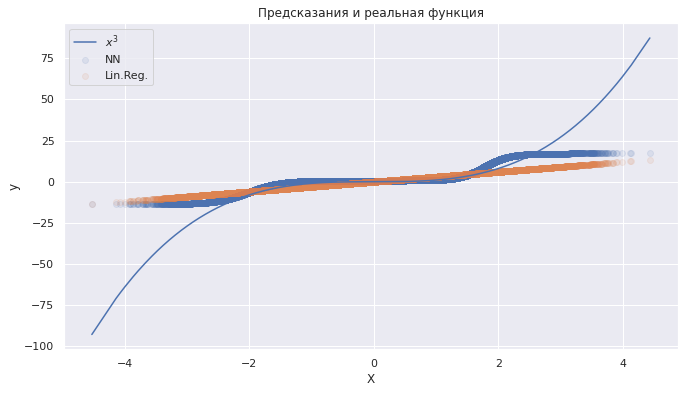

In [40]:
plt.figure(figsize=(11, 6))
plt.scatter(X_test.reshape(-1,), test_nn_preds.reshape(-1,), alpha=0.1, label="NN")
plt.scatter(X_test.reshape(-1,), test_linreg_preds.reshape(-1,), alpha=0.1, label="Lin.Reg.")
sns.lineplot(x=X_test.reshape(-1,), y=np.power(X_test, 3).reshape(-1,), label=r"$x^3$")
plt.xlabel('X')
plt.ylabel('y')
plt.title("Предсказания и реальная функция")
plt.show()

**Вывод:**
Значение ошибки в обоих случаях меньше у двуслойной нейронной сети, чем у линейной регрессии. Двуслойная нейронная сеть благодаря нелинейной функции активации позволяет точнее приближать нелинейные функции. 

---
### Задача 3.

Теперь напишите рассмотренную ранее нейронную сеть с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

In [86]:
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=2),  # кол-во признаков во входном слое 1, в выходном тоже 1
    nn.Sigmoid(),  # та же ф-ция активации, что и раньше, только из pytorch
    nn.Linear(in_features=2, out_features=1)  # кол-во признаков во входном слое 1, в выходном тоже 1
)

model

Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
)

Обучите нейросеть на рассмотренных ранее данных. Используйте код с занятия.

In [101]:
# Данные оборачиваем в тензоры, по которым не требуем вычисления градиента
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

In [102]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optim_func = nn.MSELoss()

In [103]:
def show_progress(x, y, y_pred, loss):
    '''
    Визуализация процесса обучения.
    x, y -- объекты и таргеты обучающей выборки;
    y_pred -- предсказания модели;
    loss -- текущее значение ошибки модели.
    '''

    # Избавимся от градиентов перед отрисовкой графика
    y_pred = y_pred.detach()

    # Превратим тензор размерности 0 в число, для краисивого отображения
    loss = loss.item()

    # Стираем предыдущий вывод в тот момент, когда появится следующий
    clear_output(wait=True)

    # Строим новый график
    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, alpha=0.75, label = r"$x^3$")
    plt.scatter(x, y_pred, color='orange', linewidth=5, label = "nn.Sequential")
    plt.xlabel('Признак')
    plt.ylabel('Таргет')
    plt.title("Предсказания")
    plt.legend()
    plt.show()

    print(f"MSE = {loss:.3f}")

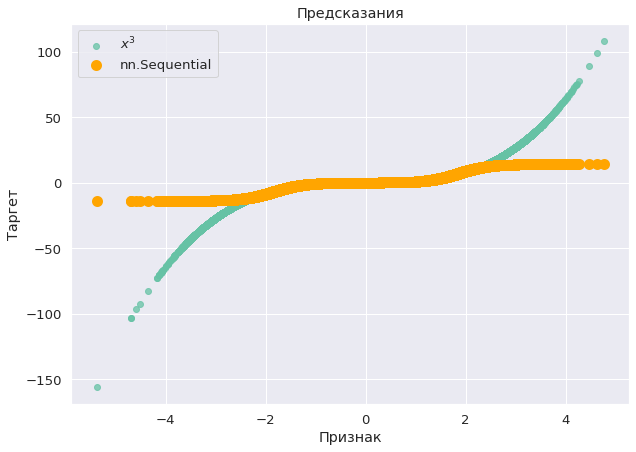

MSE = 2.221


In [104]:
# Количество итераций
num_iter = 5000

for i in range(num_iter):

    # Forward pass: предсказание модели
    y_pred = model(X_train)

    # Подсчет оптимизируемой функции (MSE)
    loss = optim_func(y_pred, y_train)

    # Bakcward pass: подсчет градиентов
    loss.backward()

    # Оптимизация: обновление параметров
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()

    if (i + 1) % 1000 == 0:
        print(i)
        show_progress(X_train, y_train, y_pred, loss)

In [105]:
test_seq_preds = model(X_test).detach().numpy().reshape(-1,)

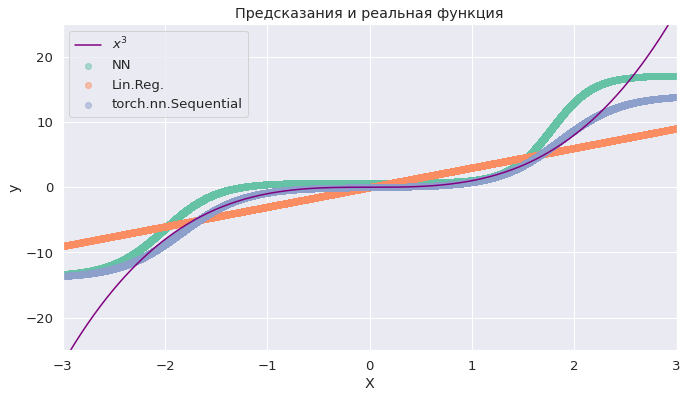

In [108]:
plt.figure(figsize=(11, 6))
plt.scatter(X_test.reshape(-1,), test_nn_preds.reshape(-1,), alpha=0.5, label="NN")
plt.scatter(X_test.reshape(-1,), test_linreg_preds.reshape(-1,), alpha=0.5, label="Lin.Reg.")
plt.scatter(X_test.reshape(-1,), test_seq_preds, alpha=0.5, label="torch.nn.Sequential")
sns.lineplot(x=X_test.reshape(-1,), y=np.power(X_test, 3).reshape(-1,), color="purple", label=r"$x^3$")

plt.xlim((-3, 3))
plt.ylim((-25, 25))
plt.xlabel('X')
plt.ylabel('y')
plt.title("Предсказания и реальная функция")
plt.show()

In [113]:
print("MSE линейной регрессии:       ", loss_fn(test_linreg_preds, y_test))
print("MSE двуслойной нейронной сети: ", loss_fn(test_nn_preds, y_test))
print("MSE torch.nn.Sequential:   ", loss_fn(test_seq_preds, y_test))

MSE линейной регрессии:        2.4309738770809877
MSE двуслойной нейронной сети:  1.8451088133011504
MSE torch.nn.Sequential:    1.4358858914902455


Модель Sequential из torch обучилась лучше, чем TwoLayerNetwork. Скорее всего дело в параметрах (learning rate, количество итераций, размер батча).